# Assignment 02: Scikit Learn Basic Regression and Classification

**Due Date:** Friday 09/20/2024 (5pm) 

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Kenneth Bilicke

CWID-5: 37189


## Introduction
--------

In this exercise we will be performing a regression and classification task using the `scikit-learn` machine learning framework, and the Python `statsmodel` library.
You should work through the tutorial on using `scikit-learn` and `statsmodel` before doing this assignment, as well as work on the materials from our units
on regression and classification tasks.

For the first part of this assignment, I recommend looking through the following tutorials on using
Scikit Learn and the statsmodel library for linear regression:

[A Beginners guide to Linear Regression in Python with Scikit-Learn](https://medium.com/analytics-vidhya/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-6b0fe70b32d7)


[Use statsmodels to Perform Linear Regression in Python](https://datatofish.com/statsmodels-linear-regression/)

I am using this material as a reference when developing the work and questions for the first Task 1 of this assignment.

In [1]:
# all imports that you use for this assignment should be placed here in the first cell to execute
# if you need something not imported for you, add the import here for your assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# By convention, we often just import the specific classes/functions in notebooks
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# statsmodels has an api, it is often imported as sm by convention
import statsmodels.api as sm

In [2]:
# Import functions/moduls from this project.  We manually set the
# PYTHONPATH to append the location to search for this assignments
# functions to just ensure the imports are found
import sys
sys.path.append("../src")

# assignment function imports for doctests and github autograding
# these are required for assignment autograding
from AssgUtils import run_doctests
from Task1sklearn import task1_sklearn
from Task1statsmodel import task1_statsmodel
from Task2labeltests import task2_label_tests
from Task2featuretests import task2_feature_tests
from Task2sklearn import task2_sklearn
from Task2statsmodel import task2_statsmodel

In [3]:
# set default figure size, 8in by 6in and figure properties here for this notebook,
# please don't change these in final submission of your work
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) 

# Task 1: Linear Regression with One Variable
--------


## Load and Explore Data

There is a file named `assg-02-weather.csv` in the data subdirectory.  Load this file into a
pandas dataframe.

In [4]:
# load file into a dataframe here
weather_data = pd.read_csv('../data/assg-02-weather.csv')


Do some basic data exploration.  Perform the following tasks:

1. Determine the number of samples in this data set.  Determine the number of features as well.
2. Display the types of the features that were read in and determined by default by Pandas in this dataframe.
3. For the numeric data types, describe the basic information about the min, max and ranges of the numeric data
4. Count the number of missing or NaN data in the dataframe (if any), show the counts of missing data for each of the features in the dataframe.
5. It will be useful to know the feature to feature correlations.  Create and display a correlation matrix of the numeric features
   in this dataset.  You will need to extract into a temporary dataframe the numeric features to do this.

In [5]:
# 1. determine number of samples and number of features here
weather_data.shape


(366, 22)

In [6]:
# 2. determine feature types
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [7]:
# 3. display basic information about the range of numeric features in the data 
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [8]:
# 4. determine if there is any missing data in the dataset, show counts of missing data for each feature
weather_data.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [9]:
# 5. show feature-to-feature correlation of the numeric features we currently have in this data
weather_corr = weather_data.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis='columns')
weather_corr.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


## Visualize the Data

We will try and create a linear regression model of the relationship between temperature and
evaporation.  There are several temperature measurements in this dataset.  

1. Using base matplotlib, create a scatter plot the relationship between
   the `Temp9am` and `Evaporation` recorded values.
   The temperature should be the independent variable (x axis) and evaporation measurement the dependent
   variable (y axis) in this plot.  Label your axis, you weren't given a data dictionary but
   see if you can figure out the likely units used to record temperature and evaporation in this data
   and label the axes accordingly.  

Text(0, 0.5, 'Evaporation (kg/m2)')

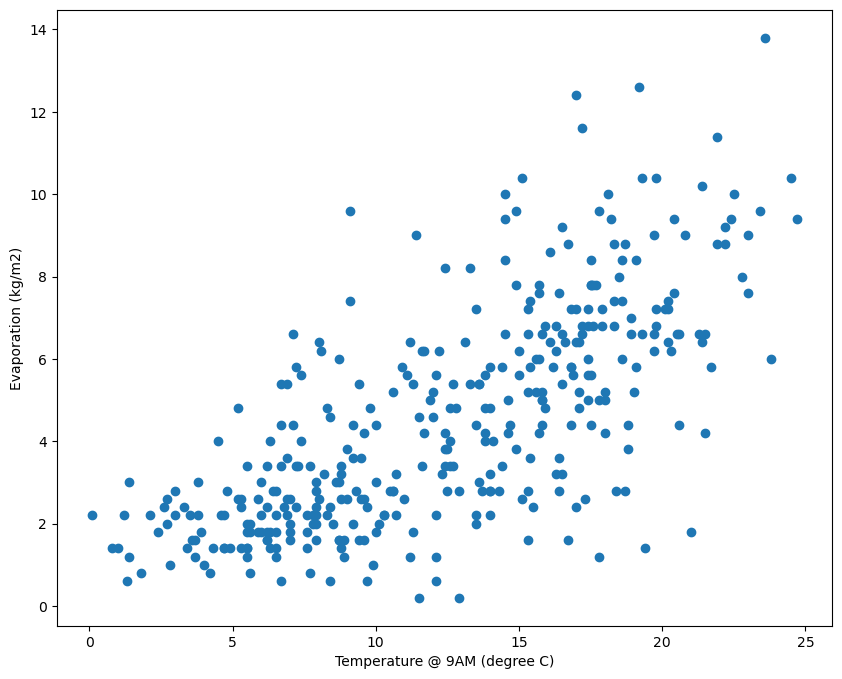

In [10]:
# create a scatter plot here to visualize the relation between the feature and the label we want to predict
# don't forget to label your axis
plt.scatter(weather_data['Temp9am'], weather_data['Evaporation'])
plt.xlabel('Temperature @ 9AM (degree C)')
plt.ylabel('Evaporation (kg/m2)')

## Build and Evaluate a Scikit-learn LinearRegression Model

We will fit a linear regression model, first using the scikit-learn framework.

Create a LinearRegression model and fit all of the 9am temperature data (independent variable) to try and
predict evaporation (dependent variable). Perform the following tasks

1. You need to define a feature array `X` and a regression label array `y` for the regression data before the
   doctest function is called.
2. Fit a scikit-learn LinearRegression to the 9am temperature data to predict evaporation.  Use all default metaparameter
   values, do not change any of the default settings for the scikit-learn linear regression.
   - You need to implement the creation of the model in the `task1_sklearn()` function (found in `src/Task1sklearn.py`.  This function should fit
     the described model and reutrn it along with the fitted `intercept, slope, mse, rmse, rsquared` values in order
     to pass all of the doctests that are performed.
   - You need to extact the 9am temperature data into an array/series called `X` and the evaporation dependent variable into a variable
     named `y` to be passed into the function where you create your model and report the model fit parameters.
3. Inside of the function you write, you need to extract and return the fitted model parameters that are tested.
   Extract and return the slope and intercept coefficients you obtained when fitting this model.
4. Extract and return the RMSE error total of this model on all of the data it was fitted with.
5. Extract and return the R^2 score of this fitted model.  The R^2 score is related to but slightly different from
   the RMSE.
6. Replot the scatter plot of your data.  But show the fitted line from the linear regression on the model.
   Label the axis the same as before.  But this time include a legend.  Make sure the data is plotted as scatter
   plot points and identified as suche in the figure.  Also plot the model as a line and identify it in the legend.
   Make your figure look like the following.  The regression model line you obtain should
   (exactly) match the one shown in this figure.

![Regression Model Result](../figures/assg-02-regression-result.png)

In [11]:
# 1. extract/create feature array X and regression label y, replace the dummy
# initializations with correct ones before calling the test function with them
X = weather_data['Temp9am'].values.reshape(-1,1)
y = weather_data['Evaporation'].values

In [12]:
# 2. fit scikit-learn LinearRegression to the temperature / evaporation data

# your work should go into the src/Task2sklearn function named task1_sklearn()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs doctests to see if your
# model fit matches the expected fit you should get
model, intercept, slopes, mse, rmse, rsquared = task1_sklearn(X, y)

# run the doc tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_doctests(task1_sklearn, globals());

Finding tests in task1_sklearn
Trying:
    from AssgUtils import isclose
Expecting nothing
ok
Trying:
    model, intercept, slopes, mse, rmse, rsquared = task1_sklearn(X, y)
Expecting nothing
ok
Trying:
    isclose(intercept, 0.37578175021210747)
Expecting:
    True
ok
Trying:
    isclose(slopes[0], 0.3354845860060065)
Expecting:
    True
ok
Trying:
    isclose(mse, 3.5473465427798607)
Expecting:
    True
ok
Trying:
    isclose(rmse, 1.8834400820784984)
Expecting:
    True
ok
Trying:
    isclose(rsquared, 0.5008050204985712)
Expecting:
    True
ok


In [13]:
# You don't have to do anything here, these will display the model fit parameters
# you return from your function.  You can compare your parameters and results to
# the expected doctest results you should obtain

# 3. return the slope and intercept coefficients of the fitted model
print('Model intercept term: ', intercept)
print('Model slope term:     ', slopes[0])

# 4. return and report the RMSE error obtained on this model with all of the data we used to fit the model
# example using scikit-learn method as shown in text/lecture notebooks
print('MSE : ', mse)
print('RMSE: ', rmse)

# 5. return and report the R^2 score of this fit. 
print('R^2 score: ', rsquared)

Model intercept term:  0.37578175021210924
Model slope term:      0.3354845860060064
MSE :  3.5473465427798607
RMSE:  1.8834400820784984
R^2 score:  0.5008050204985712


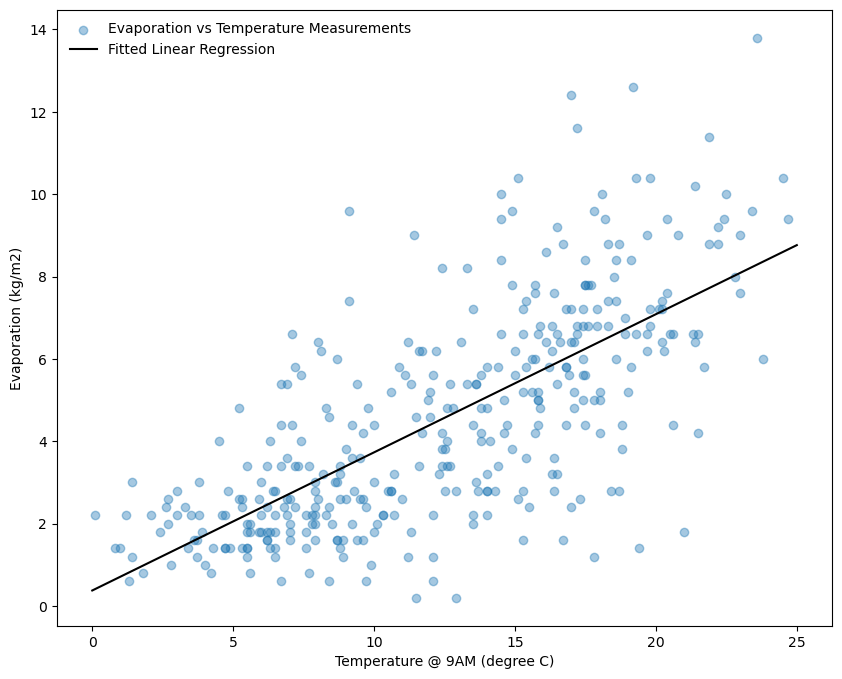

In [14]:
# 6. replot scatter plot of data adding in fitted regression model line to plot
lin_fit_x = np.linspace(0, 25, 256)
lin_fit_y = (lin_fit_x * slopes[0]) + intercept
plt.scatter(weather_data['Temp9am'], weather_data['Evaporation'], label='Evaporation vs Temperature Measurements', alpha=0.4)
plt.plot(lin_fit_x, lin_fit_y, label='Fitted Linear Regression', color='black')
plt.xlabel('Temperature @ 9AM (degree C)')
plt.ylabel('Evaporation (kg/m2)')
plt.legend(loc='upper left', frameon=False)

## Build and Evaluate a statsmodel ordinary least squares Model

For comparison, you will next use the statsmodel library to perform a linear regression on the same
independent variable (temperature at 9am) to predict evaporation.  Perform the
following tasks.

1. Create and fit a statsmodel OLS (ordinary least squared) regression of the data.  You will need
   to correctly use the statsmodel API here as discussed.  Also don't forget that, for reasons, you
   will need to create a dummy intercept term for your input data for the statsmodel OLS
   - You need to implement the creation of the model in the `task1_statsmodel()` function (found in `src/Task1statsmodel.py`.  This function should fit
     the described model and reutrn it along with the fitted `params, rsquared` values in order
     to pass all of the doctests that are performed.
   - You extracted the input feature `X` and the target variable `y` before.  You should pass in the same `X` used before, but inside of your function,
     before you create and fit your statsmodel, remember that you will need to add in the dummy constant to `X` by hand, as we should have discussed in
     class and as is discussed in some of the materials and tutorial you should have looke at.
2. Determine the intercept and slope coefficients from the summary (you only need to find and return the OLS params that holds all of these coefficients).
   Determine the R^2 score from the model and return it.  These should exactly match the expected results from the doctests if the model is created and fit
   correctly.
3. Use the statsmodel summary function to display this same information (and more) about the fitted model that is returned.

In [15]:
# 1. Create and fit a statsmodel OLS regression

# your work should go into the src/Task1statsmodel function named task1_statsmodel()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs doctests to see if your
# model fit matches the expected fit you should get
model, params, rsquared = task1_statsmodel(y, X)

# run the doc tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_doctests(task1_statsmodel, globals());

Finding tests in task1_statsmodel
Trying:
    from AssgUtils import isclose
Expecting nothing
ok
Trying:
    model, params, rsquared = task1_statsmodel(y, X)
Expecting nothing
ok
Trying:
    isclose(params[0], 0.37578175021210747)
Expecting:
    True
ok
Trying:
    isclose(params[1], 0.3354845860060065)
Expecting:
    True
ok
Trying:
    isclose(rsquared, 0.5008050204985712)
Expecting:
    True
ok


In [16]:
# 2. Determine the model parameter slope and intercept terms as well as the rsquared fit result
# and return these along with the model.  You don't have to do anything in this cell, the
# returned parameters displayed should match the expected values for the doctests
print('Model intercept term: ', params[0])
print('Model slope term:     ', params[1])
print('Model R^2 score:      ', rsquared)


Model intercept term:  0.3757817502121073
Model slope term:      0.3354845860060066
Model R^2 score:       0.5008050204985712


In [17]:
# 3. display summary information about the statsmodel OLS linear regression model fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     365.2
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           7.17e-57
Time:                        06:25:23   Log-Likelihood:                -751.05
No. Observations:                 366   AIC:                             1506.
Df Residuals:                     364   BIC:                             1514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3758      0.238      1.576      0.116      -0.093       0.845
x1             0.3355      0.018     19.110      0.000       0.301       0.370
==============================================================================
Omnibus:                       13.812   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.192
Skew:                           0.308   Prob(JB):                     6.80e-05
Kurtosis:                       3.938   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As shown here, the fitted model parameters and $R^2$ score both should exactly match
the results obtained by scikit-learn when fitting using default linear regression.  We
can see further information about the fit from the statsmodel summary.  The p-value and interval
given for the const and x1 parameters show the 95% confidence interval of the fitted coefficients.


# Task 2: Binary Classification using Logistic Classifier
--------

## Encode Categorical Variables

The weather dataset you were given contains several categorical variables.  We will try and build
a binary classifier on the `RainTomorrow` attribute.  Do the following tasks

1. Confirm that the rain tomorrow attribute is in fact a binary categorical variable. For example, use
   methods to determine all of the unique values and count how many of each you have for that attribute.
2. Create a simple pipeline to encode the rain tomorrow attribute as ordinal (integer) values.  Make sure 
   that "no" rain tomorrow is encoded as the false or 0 value, and "yes" rain tomorrow
   is encoded as the true or 1 value.
3. Encode the rain tomorrow as a categorical variable.  Save the results in a dataframe or numpy array
   (you will need to call it `y` again for the doctests) to use as the target values for training.
4. To double check, verify that no is encoded as 0 or false and yes as 1 or true after you encode the
   categorical variable.


In [18]:
# 1. verify that the rain tomorrow string attribute is a binary categorical variable by
#    determining all unique categories and counting the number of each unique category
weather_data['RainTomorrow'].value_counts()

RainTomorrow
No     300
Yes     66
Name: count, dtype: int64

In [19]:
# 2. create ordinal encoder pipeline to encode the rain tomorrow attribute
from sklearn.preprocessing import OrdinalEncoder

ordered_categories = [['No', 'Yes']]
ordinal_encoder_ordered = OrdinalEncoder(categories=ordered_categories)

In [20]:
# 3. encode the rain tomorrow as categorical variables and save result in array
#    array y or labels for training, you should replace this with your encode `y`
rain_tomorrow_cat = weather_data[['RainTomorrow']]
y = ordinal_encoder_ordered.fit_transform(rain_tomorrow_cat).reshape((-1,))

In [21]:
# 4. double check that no is encoded as 0 and yes as 1 in ordinal encoding
print(rain_tomorrow_cat.head(10))
print(y[:10])



  RainTomorrow
0          Yes
1          Yes
2          Yes
3          Yes
4           No
5           No
6           No
7           No
8          Yes
9           No
[1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]


To test that you performed the encoding correctly, your `y` will be passed through the
`task2_label_tests()` doctests to see if the expected types and encodings have been
as described.

In [22]:
# For this test, you just need to create the y labels correctly as
# described before they are tested here
ndim, shape, num_no, num_yes = task2_label_tests(y)

# run the doc tests so you can see the encoded categorical labels are as expected
run_doctests(task2_label_tests, globals());

Finding tests in task2_label_tests
Trying:
    ndim, shape, num_no, num_yes = task2_label_tests(y)
Expecting nothing
ok
Trying:
    ndim
Expecting:
    1
ok
Trying:
    shape
Expecting:
    (366,)
ok
Trying:
    num_no
Expecting:
    300
ok
Trying:
    num_yes
Expecting:
    66
ok


In [23]:
print('Label number of dimensions: ', ndim)
print('Label shape               : ', shape)
print('Label number of no labels : ', num_no)
print('Label number of yes labels: ', num_yes)

Label number of dimensions:  1
Label shape               :  (366,)
Label number of no labels :  300
Label number of yes labels:  66


## Impute Missing Data

We will be using the `Sunshine` and `Pressure3pm` attributes when building a classifier.
There are some missing values in one of these attributes.

1. Create a new dataframe or numpy array with only 2 features/columns, the `Sunshine`
   and `Pressure3pm` attributes.
2. Determine the number of missing values in each of the two attributes `Sunshine` and `Pressure3pm`
3. Create a simple imputer that will fill in missing values with
   the mean value of that attribute
4. Fit the imputer and use it to fill in missing values in your dataframe with only
   the two attributes we will use.
5. Confirm that there are no longer any missing values in the dataframe/numpy array you will use for
   training.

In [24]:
# 1. Create a new dataframe/numpy array with only the 2 features Sunshine and Pressure3pm
# You should replace this dummy with the actual one you create
d = {'Sunshine': weather_data['Sunshine'], 'Pressure3pm': weather_data['Pressure3pm']}
X_missing = pd.DataFrame(data=d)

In [25]:
# 2. Determine number of missing values in Sunshine and Pressuer3pm features
X_missing.isna().sum()

Sunshine       3
Pressure3pm    0
dtype: int64

In [26]:
# 3. Create a simple imputer to fill in missing values with mean value of attribute
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_missing)

SimpleImputer()

In [27]:
# 4. Impute missing values and fill them in with the mean of the attribute
X = imputer.transform(X_missing)
X = pd.DataFrame(X, columns=X_missing.columns)

In [28]:
# 5. Confirm that there are no longer any missing values
X.isna().sum()

Sunshine       0
Pressure3pm    0
dtype: int64

To test that you have correctly imputed the missing values with the mean, your new `X` dataframe will be passed to a test function
and doctests performed to check that the imputation looks correct.

In [29]:
# For this test, you just need to create the X features dataframe correctly as
# described before it is tested here
ndim, shape, columns, na_sum, description = task2_feature_tests(X)

# run the doc tests so you can see the imputed missing values have been done correctly
run_doctests(task2_feature_tests, globals());

Finding tests in task2_feature_tests
Trying:
    ndim, shape, columns, na_sum, description = task2_feature_tests(X)
Expecting nothing
ok
Trying:
    ndim
Expecting:
    2
ok
Trying:
    shape
Expecting:
    (366, 2)
ok
Trying:
    columns
Expecting:
    Index(['Sunshine', 'Pressure3pm'], dtype='object')
ok
Trying:
    na_sum
Expecting:
    Sunshine       0
    Pressure3pm    0
    dtype: int64
ok
Trying:
    description
Expecting:
             Sunshine  Pressure3pm
    count  366.000000   366.000000
    mean     7.909366  1016.810383
    std      3.467180     6.469422
    min      0.000000   996.800000
    25%      6.000000  1012.800000
    50%      8.600000  1017.400000
    75%     10.500000  1021.475000
    max     13.600000  1033.200000
ok


In [30]:
# you shouldn't have to do anything here, the 
# properties of your features dataframe are displayed 
# and should match the expected propertes tested by
# the previous doctests
print('Features number of dimensions: ', ndim)
print('Features shape               : ', shape)
print('Features columns: ')
print(columns)
print('Features na sums: ')
print(na_sum)
print('Features description: ')
print(description)

Features number of dimensions:  2
Features shape               :  (366, 2)
Features columns: 
Index(['Sunshine', 'Pressure3pm'], dtype='object')
Features na sums: 
Sunshine       0
Pressure3pm    0
dtype: int64
Features description: 
         Sunshine  Pressure3pm
count  366.000000   366.000000
mean     7.909366  1016.810383
std      3.467180     6.469422
min      0.000000   996.800000
25%      6.000000  1012.800000
50%      8.600000  1017.400000
75%     10.500000  1021.475000
max     13.600000  1033.200000


## Visualize Binary Classification Task

We will use the attributes `Sunshine` and `Pressure3pm` to try and build a binary classifier to predict
the rain tomorrow binary label.  First of all lets visualize the task.  Create a plot that:

1. Plot the `Sunshine` attribute as the x axis variable, and the 'Pressure3pm' attribute
   for the y axis, make sure this is a scatter plot.
2. Use shape and/or color to provide a label for each point.  Plot all points on the figure
   where rain tomorrow is yes using a shape/color, then plot all the points for no using a
   different shape/color.
3. Make sure that you create a legend that identifies the point color/shape chose for your yes/no
   category.
4. Label your x and y axis appropriately for the attributes you plotted on them.

Text(0, 0.5, 'Pressure @ 3PM (millibars)')

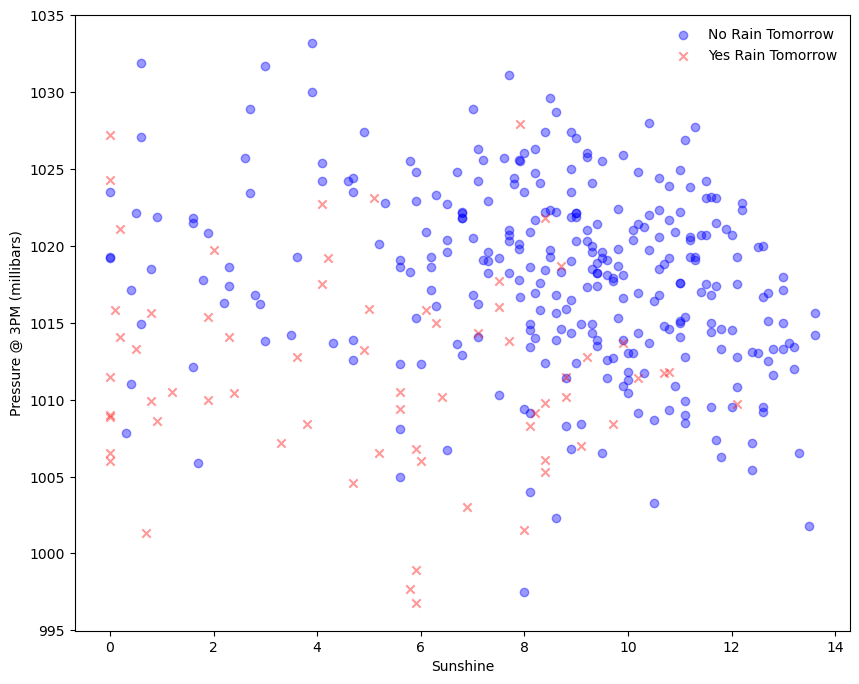

In [31]:
# create your plot here that
# 1. scatter plot Sunshine as x axis variable and  as y axis variable
plt.scatter(X['Sunshine'],X['Pressure3pm'], alpha=0)

# 2. perform separate plots for samples where rain tomorrow is yes, vs. where rain tomorrow is no
#    use color/shape to differentiate these two categories in the plot
plt.scatter(X[weather_data['RainTomorrow'] == 'No']['Sunshine'], X[weather_data['RainTomorrow'] == 'No']['Pressure3pm'],
            color='blue', marker='o', label='No Rain Tomorrow', alpha=0.4)
plt.scatter(X[weather_data['RainTomorrow'] == 'Yes']['Sunshine'], X[weather_data['RainTomorrow'] == 'Yes']['Pressure3pm'],
            color='red', marker='x', label='Yes Rain Tomorrow', alpha=0.4)

# 3. create a legend that identifies rain tomorrow yes/no points in figure
plt.legend(loc='upper right', frameon=False)

# 4. make sure you label your axes and add any other useful information to the figure
plt.xlabel('Sunshine')
plt.ylabel('Pressure @ 3PM (millibars)')


## Build Classifier using Scikit-learn LogisticRegression

Despite its name, the `LogisticRegression` method and object in scikit-learn is used
for classification tasks.  Create and fit a Logistic Regression to the `Sunshine` and
`Pressure3pm` features.  Perform the following tasks

1. Create a `LogisticRegression` using scikit-learn framework.  To make the decision boundary
   easier to visualize, use the following parameters when you create this object:
   `solver='lbfgs', C=500.0`.  These parameters also will produce a model that is almos the same as the
   one that the `statsmodel` classifier will produce.
   - You need to implement the creation of the LogisticRegression model in the `task2_sklearn()` function (found in `src/Task2sklearn.py`.  This function should fit
     the described model and reutrn it along with the fitted `intercept, slopes, accuracy` values in order
     to pass all of the doctests that are performed.
   - Fit the logistic regression model to the `Sunshine` and `Pressure3pm` attributes.  Use the X inputs
     you created before with missing values filled in. You should already have the
     y/labels created for the binary classes from before.
   - Extract and return the intercept and model coefficients found for the fitted logistic regression.
   - Extract and return the accuracy that this model achieves on all of the data you fit the model with.
3. Display a confusion matrix of the performance of this model on all of the data.

In [32]:
# 1. Create a LogisticRegression model, fit and extract and return the parameters to be tested

# your work should go into the src/Task2sklearn function named task2_sklearn()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs doctests to see if your
# model fit matches the expected fit you should get
model, intercept, slopes, accuracy = task2_sklearn(X, y)

# run the doc tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_doctests(task2_sklearn, globals());

Finding tests in task2_sklearn
Trying:
    from AssgUtils import isclose
Expecting nothing
ok
Trying:
    model, intercept, slopes, accuracy = task2_sklearn(X, y)
Expecting nothing
ok
Trying:
    isclose(intercept[0], 186.590648)
Expecting:
    True
ok
Trying:
    isclose(slopes[0][0], -0.320885)
Expecting:
    True
ok
Trying:
    isclose(slopes[0][1], -0.183120)
Expecting:
    True
ok
Trying:
    isclose(accuracy, 0.863388)
Expecting:
    True
ok


In [33]:
# The parameters returned from your function, should match and pass the expected
# results in the doctests
print('intercept: ', intercept[0])
print('Sunshine and Pressure3pm coefficients:', slopes[0])
print('Model accuracy: ', accuracy)

intercept:  186.5906480690171
Sunshine and Pressure3pm coefficients: [-0.32088535 -0.18312011]
Model accuracy:  0.8633879781420765


In [34]:
# 2. Display a confusion matrix of the performance of the model
from sklearn import metrics
predictions = model.predict(X)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[288  12]
 [ 38  28]]


## Visualize Classifier Decision Boundary

When a classification model is fit to a set of binary data, it will determine a
decision boundary.  On one side of this boundary, it predicts 'no'/'false', and on
the other side it predicts 'yes'/'true'.

You can visualize the decision boundary created by your logistic regression model.
The slope and intercept coefficients you should have displayed above will describe
the decision boundary line that was fit by the logistic regression.  When we plotted
your data, you should have used Sunshine as the x axis values, and Pressure3pm as the
y axis values.  The logistic regression model should have given you 1 intercept and 2 coefficients.
The model of the decision boundary line is thus:

\begin{equation}
0 = \text{intercept} + \text{coef}_0 \times \text{Sunshine} + \text{coef}_1 \times \text{Pressure3pm}
\end{equation}

or

\begin{equation}
0 = b + \theta_0  x + \theta_1  y
\end{equation}



Remember that we use Sunshine as our x values and Pressure3pm as our y values.  We can substitute those names
and then solve for y to get the following expression:

\begin{equation}
y = \frac{-(b + \theta_0 x)}{\theta_1}
\end{equation}

This equation allows you to determine the decision boundary line, given the intercept ($b$) of your
model and the two fitted coefficients $\theta_0 \theta_1$.  For example, to determine the line, you can
plot 2 points. The x axis Sunshine ranges from 0 to 14, so you could determine the y (Pressure3pm) location
of the decision boundary at those 2 points and draw a line on the figure to visualize the decision boundary.

You thus need to perform the following tasks to visualize the decision boundary that your fitted
logistic regression model found:

1. Replot your scatter plot figure from before of the Sunshine vs. Pressure3pm points using different markers
   for the yes rain / no rain.
2. Using the intercept and coefficient of your model, determine 2 points on the decision boundary line.  Add
   this line to the figure.
3. Make sure your legend includes a label for the decision boundary line.  Make sure axes are labeled
   and legend identifies yes, no markers and the decision boundary line.

Your resulting figure should look as close to the following as possible.  You should get the shown
decision boundary line if you use the parameters shown for your logistic regression:

![Logistic Classification Decision Boundary](../figures/assg-02-decision-boundary.png)

Text(0, 0.5, 'Pressure @ 3PM (millibars)')

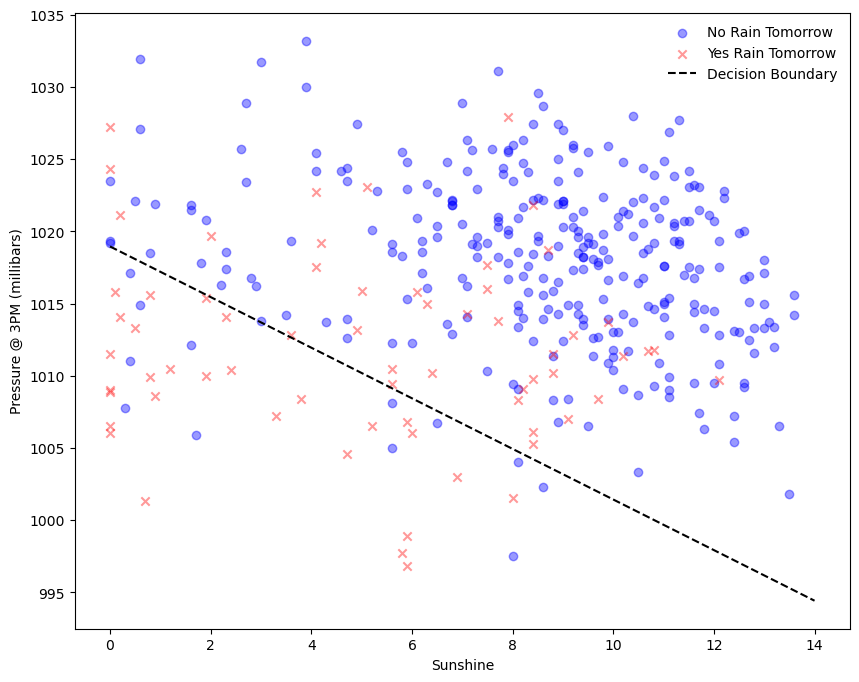

In [35]:
# create your scatter plot here and plot the decision boundary on the plot to match
# the figure above
boundary_intercept = intercept[0]
sunshine_coef = slopes[0][0]
pressure_coef = slopes[0][1]

boundary_x = np.linspace(0,14,2)
boundary_y = (-1 * (intercept + (sunshine_coef * boundary_x))) / pressure_coef

plt.scatter(X[weather_data['RainTomorrow'] == 'No']['Sunshine'], X[weather_data['RainTomorrow'] == 'No']['Pressure3pm'],
            color='blue', marker='o', label='No Rain Tomorrow', alpha=0.4)
plt.scatter(X[weather_data['RainTomorrow'] == 'Yes']['Sunshine'], X[weather_data['RainTomorrow'] == 'Yes']['Pressure3pm'],
            color='red', marker='x', label='Yes Rain Tomorrow', alpha=0.4)
plt.plot(boundary_x, boundary_y, color='black', linestyle='--', label='Decision Boundary')

plt.legend(loc='upper right', frameon=False)
plt.xlabel('Sunshine')
plt.ylabel('Pressure @ 3PM (millibars)')

In [36]:
# Adding this cell to save accuracy value for comparison later
sk_accuracy = accuracy

## Build Classifier using statsmodel Logit

We will also demonstrate building a binary classifier using the statsmodel library.
Perform the following:

1. Create a statsmodel Logit instance and fit it to your two features  and binary category labels.
   Remember that the api for statsmodel reverses the order of the inputs and the labels when fitting.
   Do not change any of the default metaparamters of the Logit, use the default settings for this model.
   - You need to implement the creation of the statsmodel logiistic regression model
     in the `task2_statsmodel()` function (found in `src/Task2statsmodel.py`).
   - This function should fit the described model and reutrn it along with the fitted `params, accuracy` values
     in order to pass all of the doctests that are performed.
   - Fit the logistic regression model to the Sunshine and Pressure3pm attributes. Use the X inputs you created before with missing values filled in.
     You should already have the y/labels created for the binary classes from before.
   - You should pass in the `X` unmodified, but don't forget that you need to add a dummy constant term
     to the features array to be used by `statsmodel`
   - Extract and return the intercept and model parameters found for the fitted logistic regression.
   - Extract and return the accuracy that this model achieves on all of the data you fit the model with.
2. Display a summary of the fitted model obtained by the statsmodel Logit
3. Compare results from statsmodel and scikit learn.  Did they get an equivalent model?

In [37]:
# 2. Create Logit instance and fit it to the data, make sure to add dummy feature to X, and extract
# and return the model parameters

# your work should go into the src/Task2statsmodel function named task2_statsmodel()
# This cell must not be removed or modified, it calls your function to create a model and
# return the fitted parameters from the regression, and it runs doctests to see if your
# model fit matches the expected fit you should get
model, params, accuracy = task2_statsmodel(y, X)

# run the doc tests so you can see if your fitted model got the expected results
# if any of these tests do not pass (don't get ok result) you have done something
# wrong in creating your data and/or fitting your model and extracting the
# fit parameters
run_doctests(task2_statsmodel, globals());

Optimization terminated successfully.
         Current function value: 0.324586
         Iterations 7
Finding tests in task2_statsmodel
Trying:
    from AssgUtils import isclose
Expecting nothing
ok
Trying:
    model, params, accuracy = task2_statsmodel(y, X)
Expecting:
    Optimization terminated successfully.
             Current function value: 0.324586
             Iterations 7
ok
Trying:
    isclose(params['const'], 186.59040174670466)
Expecting:
    True
ok
Trying:
    isclose(params['Sunshine'], -0.3208828310913976)
Expecting:
    True
ok
Trying:
    isclose(params['Pressure3pm'], -0.18311988277396155)
Expecting:
    True
ok
Trying:
    isclose(accuracy, 0.8633879781420765)
Expecting:
    True
ok


In [38]:
# 2. Display a summary of the statsmodel fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:                        MNLogit   Df Residuals:                      363
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Sep 2024   Pseudo R-squ.:                  0.3122
Time:                        06:25:24   Log-Likelihood:                -118.80
converged:                       True   LL-Null:                       -172.71
Covariance Type:            nonrobust   LLR p-value:                 3.853e-24
===============================================================================
        y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         186.5904     28.859      6.466      0.000     130.028     243.153
Sunshine       -0.3209      0.047     -6.789      0.000      -0.414      -0.228
Pressure3pm    -0.1831      0.028     -6.452      0.000      -0.239      -0.127
===============================================================================
"""

In [39]:
# 3. Compare accuracy, you can demonstrate or change/add a markdown cell and discuss
print(f'sklearn intercept: {intercept[0]}, sm intercept: {params['const']}')
print(f'sklearn sunshine_coef: {slopes[0][0]}, sm sunshine_coef: {params['Sunshine']}')
print(f'sklearn pressure_coef: {slopes[0][1]}, sm pressure_coef: {params['Pressure3pm']}')
print(f'sklearn accuracy: {sk_accuracy}, sm accuracy: {accuracy}')

sklearn intercept: 186.5906480690171, sm intercept: 186.59040174670162
sklearn sunshine_coef: -0.32088535377297106, sm sunshine_coef: -0.32088283109139626
sklearn pressure_coef: -0.18312011085775776, sm pressure_coef: -0.18311988277395858
sklearn accuracy: 0.8633879781420765, sm accuracy: 0.8633879781420765


**Compare the Results**

Discuss and compare the two classifiers.  Are the parameters obtained the same?  Do they
achieve the same accuracy?

The two classifiers obtained the same parameters and achieved the same accuracy. 

## Extra: Improve the Classifier
--------

I may give a point or to back of missed points on the assignment for doing the following.
We only used 2 features in our classifier because that makes it possible to visualize the
decision boundary.  However, the RISK_MM feature is highly correlated with the rain tomorrow
binary label we are trying to predict.

Create a logistic regression model (you can use either scikit-learn or statsmodel or both).  But this
time train with the RISK_MM, along with the other two features we used before.  Report accuracy and confusion matrix for this model.  If interested, you can look at the correlation of other features
given in the dataset, and try adding others besides these 3 to see if you can get further improvements.

In [40]:
# extra work here
# using Z instead of X so that previous work isn't used
new_d = {'Sunshine': weather_data['Sunshine'], 'Pressure3pm': weather_data['Pressure3pm'], 'RISK_MM': weather_data['RISK_MM']}
Z_missing = pd.DataFrame(data=new_d)
Z_missing.isna().sum()

Sunshine       3
Pressure3pm    0
RISK_MM        0
dtype: int64

In [41]:
imputer.fit(Z_missing)
Z = imputer.transform(Z_missing)
Z = pd.DataFrame(Z, columns=Z_missing.columns)
Z.isna().sum()

Sunshine       0
Pressure3pm    0
RISK_MM        0
dtype: int64

In [42]:
new_model = LogisticRegression()
new_model.fit(Z,y)

new_predictions = new_model.predict(Z)
new_score = new_model.score(Z, y)

In [43]:
print(f'Model accuracy including RISK_MM feature: {new_score}')

Model accuracy including RISK_MM feature: 0.9918032786885246


In [44]:
from sklearn import metrics
cm = metrics.confusion_matrix(y, new_predictions)
print(cm)

[[300   0]
 [  3  63]]


I ran the model with the previously provided parameters (solver='lbfgs', C=500.0), and the accuracy was 1.0 and the confusion matrix was perfect.